In [1]:
# Install Ultralytics (YOLOv8)
!pip install ultralytics

# Cek versi
import ultralytics
ultralytics.checks()

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [2]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
import gdown
import zipfile
import os
import random
import shutil
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [4]:
url = 'https://drive.google.com/uc?id=1vt8A5IPheadrNI2i4WH8R_NXA6lfB2nn'
output = 'Waste-dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1vt8A5IPheadrNI2i4WH8R_NXA6lfB2nn
From (redirected): https://drive.google.com/uc?id=1vt8A5IPheadrNI2i4WH8R_NXA6lfB2nn&confirm=t&uuid=b51f7a80-238b-4cc9-8c1e-85a8906227a1
To: /content/Waste-dataset.zip
100%|██████████| 375M/375M [00:05<00:00, 72.9MB/s]


'Waste-dataset.zip'

In [5]:
# Unzip dataset
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('waste_dataset')

In [6]:
# Paths awal
images_dir = '/content/waste_dataset/images'
labels_dir = '/content/waste_dataset/labels'

# Paths setelah split
base_output_dir = '/content/waste_dataset'
split_ratio = [0.8, 0.1, 0.1]  # train, val, test

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_output_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(base_output_dir, 'labels', split), exist_ok=True)

# Ambil semua nama file gambar
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
random.shuffle(image_files)

total_images = len(image_files)
train_count = int(total_images * split_ratio[0])
val_count = int(total_images * split_ratio[1])

In [7]:
# Bagi dataset
train_files = image_files[:train_count]
val_files = image_files[train_count:train_count+val_count]
test_files = image_files[train_count+val_count:]

In [8]:
def move_files(file_list, split_name):
    for filename in file_list:
        img_src = os.path.join(images_dir, filename)
        label_src = os.path.join(labels_dir, filename.replace('.jpg', '.txt').replace('.png', '.txt'))

        img_dst = os.path.join(base_output_dir, 'images', split_name, filename)
        label_dst = os.path.join(base_output_dir, 'labels', split_name, os.path.basename(label_src))

        shutil.copy(img_src, img_dst)
        if os.path.exists(label_src):
            shutil.copy(label_src, label_dst)

move_files(train_files, 'train')
move_files(val_files, 'val')
move_files(test_files, 'test')

print("Selesai membagi dataset menjadi train, val, dan test.")

Selesai membagi dataset menjadi train, val, dan test.


In [9]:
# Buat model baru (YOLOv8n adalah yang kecil dan cepat)
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 97.1MB/s]


In [10]:
# Training
model.train(
    data='/content/waste_dataset/data.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    name='waste_detection_model',
    pretrained=True
)

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/waste_dataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=waste_detection_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 25.3MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 118MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1204.9±419.1 MB/s, size: 44.2 KB)


train: Scanning /content/waste_dataset/labels/train... 8371 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8371/8371 [00:03<00:00, 2450.00it/s]


train: New cache created: /content/waste_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 508.9±130.4 MB/s, size: 40.5 KB)


val: Scanning /content/waste_dataset/labels/val... 1046 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1046/1046 [00:00<00:00, 1291.41it/s]

val: New cache created: /content/waste_dataset/labels/val.cache


Plotting labels to runs/detect/waste_detection_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/waste_detection_model
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.45G      1.326      2.288      1.444         74        640: 100%|██████████| 524/524 [02:24<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:11<00:00,  2.82it/s]

                   all       1046       7381      0.519      0.383      0.386      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.06G      1.328      1.839      1.442         30        640: 100%|██████████| 524/524 [02:16<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.16it/s]

                   all       1046       7381      0.476      0.398      0.385      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.73G      1.339      1.787      1.465         19        640: 100%|██████████| 524/524 [02:15<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.22it/s]

                   all       1046       7381      0.566      0.441      0.452       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.24G      1.327      1.701       1.45          8        640: 100%|██████████| 524/524 [02:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.07it/s]

                   all       1046       7381      0.564        0.4      0.426      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.91G      1.276      1.604      1.429         35        640: 100%|██████████| 524/524 [02:13<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.47it/s]

                   all       1046       7381      0.596      0.461      0.497      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.84G      1.268       1.54      1.413         21        640: 100%|██████████| 524/524 [02:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.62it/s]

                   all       1046       7381      0.626      0.457      0.516      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.19G      1.267      1.528      1.412         27        640: 100%|██████████| 524/524 [02:12<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.22it/s]

                   all       1046       7381      0.617      0.444      0.501      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.15G      1.264      1.467      1.394          9        640: 100%|██████████| 524/524 [02:17<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.46it/s]

                   all       1046       7381      0.641      0.473      0.529      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.39G      1.237      1.432      1.383         25        640: 100%|██████████| 524/524 [02:13<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.48it/s]

                   all       1046       7381      0.662      0.477      0.539      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.25G      1.236      1.389      1.374        115        640: 100%|██████████| 524/524 [02:13<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.64it/s]

                   all       1046       7381      0.654       0.52      0.572      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.61G      1.213      1.366      1.361         13        640: 100%|██████████| 524/524 [02:12<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.36it/s]


                   all       1046       7381      0.667      0.497      0.568      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.99G      1.202      1.336      1.358         29        640: 100%|██████████| 524/524 [02:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.39it/s]


                   all       1046       7381      0.656      0.524      0.582      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.98G      1.201      1.308      1.353         21        640: 100%|██████████| 524/524 [02:12<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.44it/s]

                   all       1046       7381      0.669      0.548      0.611      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.22G      1.187      1.296      1.347         12        640: 100%|██████████| 524/524 [02:13<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.37it/s]

                   all       1046       7381       0.71      0.531      0.606      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.23G      1.177      1.266      1.343         49        640: 100%|██████████| 524/524 [02:15<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.47it/s]


                   all       1046       7381      0.708       0.55      0.628      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.25G      1.178      1.219      1.335         27        640: 100%|██████████| 524/524 [02:16<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.41it/s]

                   all       1046       7381      0.731      0.557      0.646      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.27G      1.159      1.207      1.324         96        640: 100%|██████████| 524/524 [02:13<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.47it/s]


                   all       1046       7381      0.733      0.575      0.658      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.29G      1.143      1.178      1.316         10        640: 100%|██████████| 524/524 [02:12<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.45it/s]

                   all       1046       7381      0.751      0.556      0.656      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       7.3G      1.135      1.175       1.32          8        640: 100%|██████████| 524/524 [02:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.45it/s]

                   all       1046       7381       0.73      0.581      0.664      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.32G      1.141       1.15      1.312         73        640: 100%|██████████| 524/524 [02:15<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.48it/s]


                   all       1046       7381      0.709      0.575      0.653      0.468
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.34G      1.143      1.152      1.341          5        640: 100%|██████████| 524/524 [02:09<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.49it/s]

                   all       1046       7381      0.759      0.578      0.675      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.35G      1.143       1.12      1.335         19        640: 100%|██████████| 524/524 [02:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.38it/s]


                   all       1046       7381      0.734      0.597      0.668      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.37G      1.118      1.096       1.32         11        640: 100%|██████████| 524/524 [02:07<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.79it/s]

                   all       1046       7381       0.73      0.604      0.679      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.52G      1.114      1.064      1.317          6        640: 100%|██████████| 524/524 [02:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.51it/s]


                   all       1046       7381      0.768      0.595      0.693      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.28G      1.108      1.029      1.303         61        640: 100%|██████████| 524/524 [02:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.43it/s]


                   all       1046       7381      0.769      0.603      0.699      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.11G      1.092      1.019      1.303          4        640: 100%|██████████| 524/524 [02:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.55it/s]

                   all       1046       7381      0.742       0.63      0.707      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.34G      1.088     0.9958      1.292          3        640: 100%|██████████| 524/524 [02:07<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.67it/s]

                   all       1046       7381      0.767      0.612      0.698      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.47G      1.082     0.9759      1.285          4        640: 100%|██████████| 524/524 [02:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.50it/s]

                   all       1046       7381      0.754      0.628      0.712      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.42G      1.075     0.9573      1.276         14        640: 100%|██████████| 524/524 [02:08<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.50it/s]

                   all       1046       7381      0.751      0.625      0.707      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.13G      1.067     0.9314      1.269        136        640: 100%|██████████| 524/524 [02:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.71it/s]

                   all       1046       7381      0.752      0.631      0.709      0.527



30 epochs completed in 1.191 hours.
Optimizer stripped from runs/detect/waste_detection_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/waste_detection_model/weights/best.pt, 6.2MB

Validating runs/detect/waste_detection_model/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:12<00:00,  2.60it/s]


                   all       1046       7381      0.751      0.631      0.709      0.527
         BIODEGRADABLE        219       4679      0.804      0.502      0.635      0.368
             CARDBOARD        161        465       0.72      0.589      0.671      0.527
                 GLASS        265        737      0.813      0.665      0.756      0.593
                 METAL        186        570      0.726      0.747       0.77      0.563
                 PAPER        197        396      0.808      0.649      0.748      0.632
               PLASTIC        140        534      0.637      0.634      0.676      0.481
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/waste_detection_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbd642c05d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [11]:
# Mengevaluasi performa model di test set
metrics = model.val()

print(metrics)

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1139.6±471.3 MB/s, size: 28.7 KB)


val: Scanning /content/waste_dataset/labels/val.cache... 1046 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1046/1046 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:14<00:00,  4.49it/s]


                   all       1046       7381      0.753      0.631       0.71      0.527
         BIODEGRADABLE        219       4679      0.804      0.501      0.636      0.368
             CARDBOARD        161        465      0.724      0.592      0.672      0.527
                 GLASS        265        737      0.813      0.664      0.754      0.592
                 METAL        186        570      0.727      0.747      0.771      0.563
                 PAPER        197        396      0.815      0.646      0.749      0.632
               PLASTIC        140        534      0.637      0.633      0.679      0.481
Speed: 0.7ms preprocess, 3.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/waste_detection_model2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbd61b73150>
curves:

In [22]:
# Load model hasil training
model = YOLO('/content/runs/detect/waste_detection_model/weights/best.pt')

# Prediksi gambar
results = model.predict(source='/content/bontol.jpg', save=True)


image 1/1 /content/bontol.jpg: 480x640 9 PLASTICs, 11.8ms
Speed: 4.8ms preprocess, 11.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4


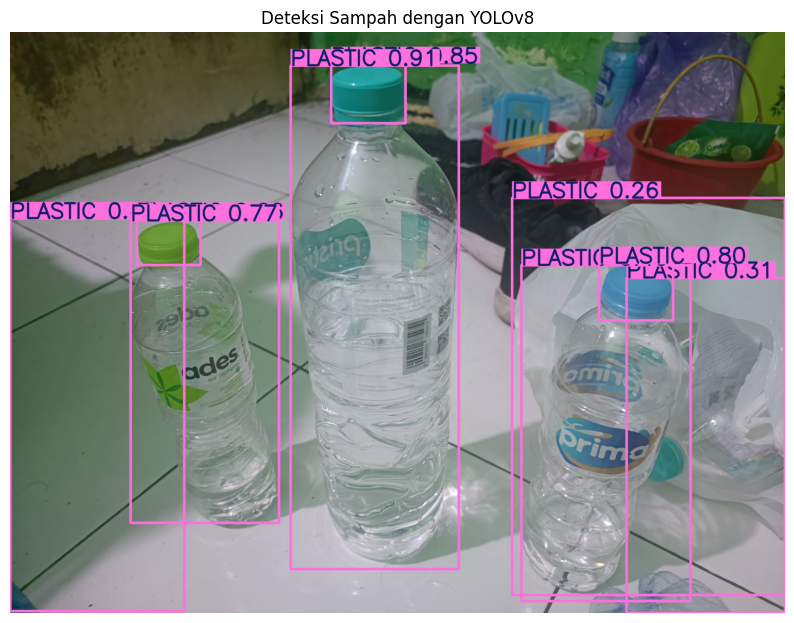

In [23]:
# Path hasil prediksi (file otomatis disimpan di runs/detect/predict)
predicted_img_path = '/content/runs/detect/predict4/bontol.jpg'

# Load gambar
img = cv2.imread(predicted_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Karena OpenCV pakai BGR, kita ubah ke RGB

# Tampilkan
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Deteksi Sampah dengan YOLOv8')
plt.show()

In [20]:
# Export model ke ONNX format
model.export(format='onnx')

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/runs/detect/waste_detection_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 303.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 282.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 231.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 195.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 332.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.5s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with o

'/content/runs/detect/waste_detection_model/weights/best.onnx'

In [21]:
# Export model ke TFLite format
model.export(format='tflite')

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/runs/detect/waste_detection_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx2tf>=1.26.3'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 209.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 136.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.6/446.6 kB 354.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.2s, installed 4 packages: ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx2tf>=1.26.3']
WARNING ⚠️ requirements: Restart ru

100%|██████████| 1.11M/1.11M [00:00<00:00, 33.8MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 48.73file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 1.1s, saved as '/content/runs/detect/waste_detection_model/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.2...
TensorFlow SavedModel: export success ✅ 44.7s, saved as '/content/runs/detect/waste_detection_model/weights/best_saved_model' (30.1 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/runs/detect/waste_detection_model/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (45.4s)
Results saved to /content/runs/detect/waste_detection_model/weights
Predict:         yolo predict task=detect model=/content/runs/detect/waste_detection_model/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/waste_detection_model/weights/best_saved_model/best_float32.tflite imgsz=640 data=/content/waste_dataset/data.yaml  
Visualize:   

'/content/runs/detect/waste_detection_model/weights/best_saved_model/best_float32.tflite'

In [24]:
# Training
model.train(
    data='/content/waste_dataset/data.yaml',
    epochs=20,
    imgsz=640,
    batch=16,
    name='waste_detection_model',
    pretrained=True
)

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/waste_detection_model/weights/best.pt, data=/content/waste_dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=waste_detection_model3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning /content/waste_dataset/labels/train.cache... 8371 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8371/8371 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 295.2±87.4 MB/s, size: 40.5 KB)


val: Scanning /content/waste_dataset/labels/val.cache... 1046 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1046/1046 [00:00<?, ?it/s]


Plotting labels to runs/detect/waste_detection_model3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/waste_detection_model3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.52G      1.687      1.862      1.746         74        640: 100%|██████████| 524/524 [02:28<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.36it/s]

                   all       1046       7381      0.629      0.473      0.538      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.07G      1.286      1.389      1.432         30        640: 100%|██████████| 524/524 [02:22<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.36it/s]

                   all       1046       7381      0.668      0.527      0.595      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.72G      1.258      1.373       1.41         19        640: 100%|██████████| 524/524 [02:19<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.10it/s]

                   all       1046       7381      0.657      0.529       0.59      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.24G      1.242      1.346      1.394          8        640: 100%|██████████| 524/524 [02:47<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.40it/s]

                   all       1046       7381      0.697      0.521      0.612      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       3.9G      1.192      1.287      1.366         35        640: 100%|██████████| 524/524 [02:18<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.51it/s]

                   all       1046       7381      0.654      0.565       0.61      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.85G      1.187      1.259      1.352         21        640: 100%|██████████| 524/524 [02:17<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.43it/s]

                   all       1046       7381      0.719       0.55      0.638      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.19G       1.19      1.248      1.356         27        640: 100%|██████████| 524/524 [02:19<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.38it/s]

                   all       1046       7381      0.721      0.562      0.645      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.15G      1.184      1.211       1.34          9        640: 100%|██████████| 524/524 [02:19<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.72it/s]

                   all       1046       7381      0.718       0.55      0.627       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.45G      1.165       1.19      1.331         25        640: 100%|██████████| 524/524 [02:21<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.31it/s]

                   all       1046       7381        0.7      0.556      0.629      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.26G      1.168      1.159      1.323        115        640: 100%|██████████| 524/524 [02:20<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.44it/s]

                   all       1046       7381      0.729      0.549      0.633      0.461


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.41G      1.154      1.146      1.344         38        640: 100%|██████████| 524/524 [02:13<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.42it/s]

                   all       1046       7381      0.737      0.569      0.659      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.79G      1.145      1.103      1.332         12        640: 100%|██████████| 524/524 [02:11<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.47it/s]

                   all       1046       7381      0.732      0.605      0.676      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.23G      1.128      1.077      1.323         16        640: 100%|██████████| 524/524 [02:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.42it/s]

                   all       1046       7381      0.768       0.58      0.678      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.47G      1.116      1.042      1.317        193        640: 100%|██████████| 524/524 [02:11<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.52it/s]

                   all       1046       7381      0.776      0.589      0.689      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.45G      1.114       1.02      1.312          4        640: 100%|██████████| 524/524 [02:10<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.48it/s]

                   all       1046       7381      0.764      0.593      0.682      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.06G      1.103     0.9961      1.302         14        640: 100%|██████████| 524/524 [02:11<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.47it/s]

                   all       1046       7381      0.766      0.621      0.702      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.22G      1.095     0.9736      1.292         17        640: 100%|██████████| 524/524 [02:10<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.50it/s]

                   all       1046       7381      0.777      0.608      0.705      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.18G       1.09     0.9688      1.289          5        640: 100%|██████████| 524/524 [02:12<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.46it/s]

                   all       1046       7381      0.783      0.608      0.704      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.23G      1.066     0.9379      1.274          6        640: 100%|██████████| 524/524 [02:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.50it/s]

                   all       1046       7381      0.754      0.624      0.705      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.97G      1.069     0.9335      1.275          7        640: 100%|██████████| 524/524 [02:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.47it/s]

                   all       1046       7381      0.783      0.612      0.705      0.523



20 epochs completed in 0.823 hours.
Optimizer stripped from runs/detect/waste_detection_model3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/waste_detection_model3/weights/best.pt, 6.2MB

Validating runs/detect/waste_detection_model3/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:12<00:00,  2.55it/s]


                   all       1046       7381      0.783      0.611      0.705      0.523
         BIODEGRADABLE        219       4679      0.791      0.506      0.637      0.371
             CARDBOARD        161        465      0.706      0.574      0.645      0.508
                 GLASS        265        737       0.82      0.661      0.756      0.598
                 METAL        186        570      0.772      0.711      0.777      0.562
                 PAPER        197        396      0.865      0.601      0.725      0.609
               PLASTIC        140        534      0.746      0.615      0.691      0.493
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/waste_detection_model3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbd65e1ab10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [25]:
# Mengevaluasi performa model di test set
metrics = model.val()

print(metrics)

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1073.7±391.6 MB/s, size: 28.7 KB)


val: Scanning /content/waste_dataset/labels/val.cache... 1046 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1046/1046 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:13<00:00,  4.73it/s]


                   all       1046       7381      0.785       0.61      0.705      0.523
         BIODEGRADABLE        219       4679      0.792      0.505      0.636       0.37
             CARDBOARD        161        465      0.705      0.571      0.645      0.507
                 GLASS        265        737      0.822      0.659      0.755      0.597
                 METAL        186        570      0.779      0.709      0.777      0.561
                 PAPER        197        396      0.867      0.601      0.726      0.609
               PLASTIC        140        534      0.747      0.614      0.691      0.494
Speed: 0.7ms preprocess, 3.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/waste_detection_model32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbd67a5c350>
curves

In [26]:
# Load model hasil training
model = YOLO('/content/runs/detect/waste_detection_model3/weights/best.pt')

# Prediksi gambar
results = model.predict(source='/content/bontol.jpg', save=True)


image 1/1 /content/bontol.jpg: 480x640 8 PLASTICs, 9.6ms
Speed: 3.6ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5


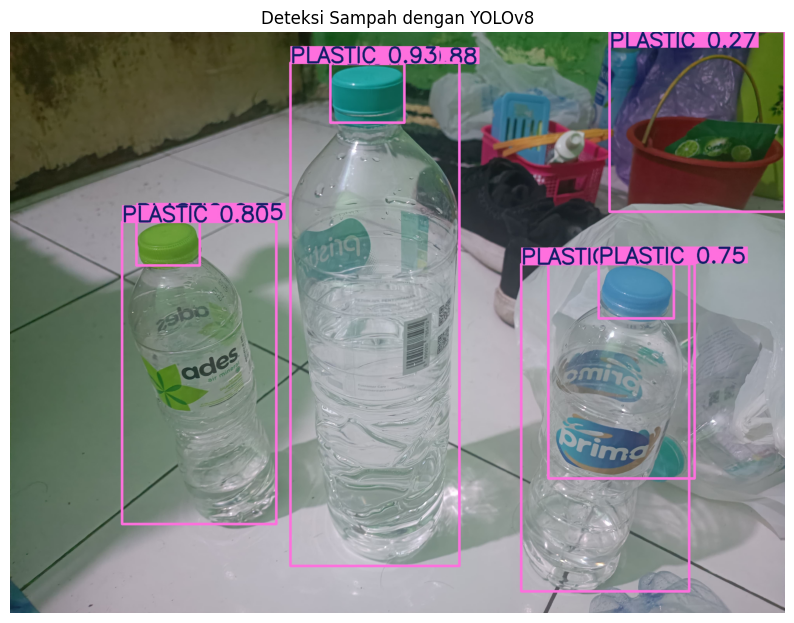

In [27]:
# Path hasil prediksi (file otomatis disimpan di runs/detect/predict)
predicted_img_path = '/content/runs/detect/predict5/bontol.jpg'

# Load gambar
img = cv2.imread(predicted_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Karena OpenCV pakai BGR, kita ubah ke RGB

# Tampilkan
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Deteksi Sampah dengan YOLOv8')
plt.show()

In [30]:
# Load model hasil training
model = YOLO('/content/runs/detect/waste_detection_model3/weights/best.pt')

# Prediksi gambar
results = model.predict(source='/content/jeruk.jpg', save=True)


image 1/1 /content/jeruk.jpg: 608x640 5 BIODEGRADABLEs, 39.8ms
Speed: 2.4ms preprocess, 39.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/detect/predict7


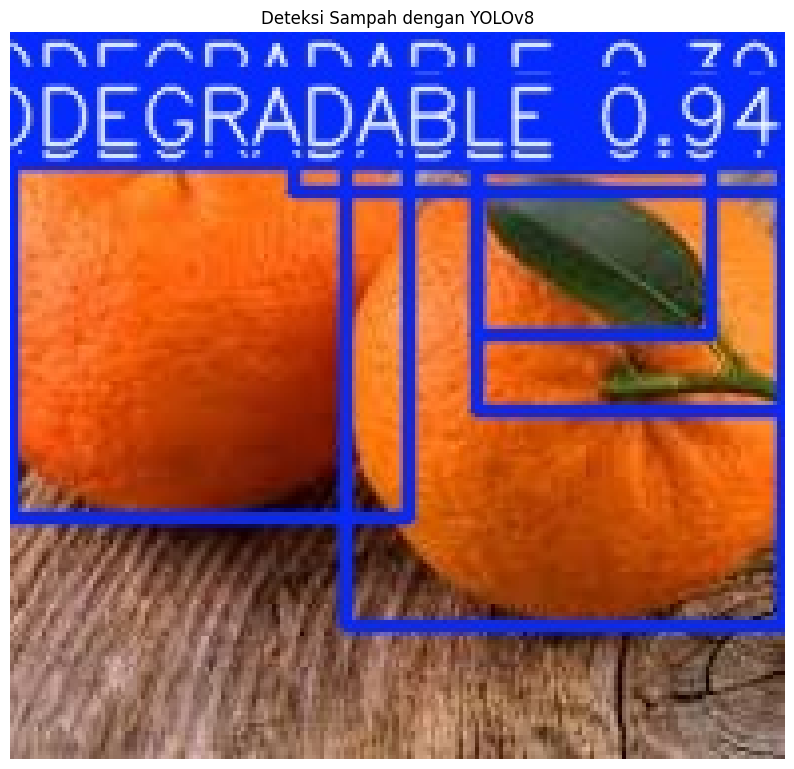

In [31]:
# Path hasil prediksi (file otomatis disimpan di runs/detect/predict)
predicted_img_path = '/content/runs/detect/predict7/jeruk.jpg'

# Load gambar
img = cv2.imread(predicted_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Karena OpenCV pakai BGR, kita ubah ke RGB

# Tampilkan
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Deteksi Sampah dengan YOLOv8')
plt.show()

In [32]:
# Export model ke ONNX format
model.export(format='onnx')

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/runs/detect/waste_detection_model3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 1.1s, saved as '/content/runs/detect/waste_detection_model3/weights/best.onnx' (11.7 MB)

Export complete (1.4s)
Results saved to /content/runs/detect/waste_detection_model3/weights
Predict:         yolo predict task=detect model=/content/runs/detect/waste_detection_model3/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/waste_detection_model3/weights/best.onnx imgsz=640 data=/content/waste_dataset/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/waste_detection_model3/weights/best.onnx'

In [33]:
# Export model ke TFLite format
model.export(format='tflite')

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/runs/detect/waste_detection_model3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)

TensorFlow SavedModel: starting export with tensorflow 2.18.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success ✅ 1.1s, saved as '/content/runs/detect/waste_detection_model3/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.2...
TensorFlow SavedModel: export success ✅ 28.8s, saved as '/content/runs/detect/waste_detection_model3/weights/best_saved_model' (30.1 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/runs/detect/waste_detection_model3/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (29.3s)
Results saved to /content/runs/detect/wast

'/content/runs/detect/waste_detection_model3/weights/best_saved_model/best_float32.tflite'